# Keras を利用した CNN による画像分類

# 1. 事前準備と ResNet50の生成

## 必要なライブラリのインポート

In [2]:
from imagenet_util import *

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
import numpy as np

## ResNet50 を生成

In [3]:
model = ResNet50(weights='imagenet')

## モデルのサマリを表示

In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# 2. 画像の分類

## 画像のロード

In [5]:
image_path = '../../images/chihuahua1.jpg'
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
print('image type:', type(image))
print('image.shape', image.shape)

image type: <class 'numpy.ndarray'>
image.shape (224, 224, 3)


## 画像の表示

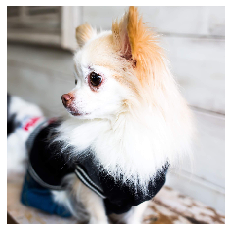

In [6]:
plt.axis('off')
plt.imshow(image/255.0)

## 画像の正規化

In [7]:
norm_image = preprocess_input(image.copy())

## 画像のバッチ化

In [8]:
X = np.expand_dims(norm_image, axis=0)
print(X.shape)

(1, 224, 224, 3)


## 推論

In [9]:
Y_hat = model.predict(X)
print('Y_hat.shape:', Y_hat.shape)
print('Y_hat:\n', Y_hat)

Y_hat.shape: (1, 1000)
Y_hat:
 [[1.92723018e-10 1.34946433e-07 8.98964458e-10 1.19710103e-10
  2.20844365e-09 7.62665131e-09 1.84944046e-10 1.58127091e-06
  7.91352159e-06 2.41450273e-08 1.14379961e-09 1.37630911e-08
  1.01249631e-09 8.83256523e-10 3.22403909e-10 2.90206579e-08
  1.10089765e-07 1.40120022e-07 7.20518400e-08 2.07638369e-08
  2.63638888e-09 2.09062634e-08 1.05989022e-08 9.05081592e-08
  1.71452363e-09 8.86935136e-10 8.40270020e-10 1.61944658e-09
  9.61725588e-10 1.13119341e-07 1.52079838e-09 3.26068239e-09
  2.22721286e-09 8.92547203e-10 9.23130739e-10 2.58166621e-09
  1.67356848e-08 1.71186376e-09 2.97441138e-09 3.88053323e-09
  1.03693620e-09 9.00756714e-09 1.04760356e-09 2.40990050e-09
  6.55570132e-09 2.41159714e-09 3.75882525e-09 3.51780410e-10
  6.29916841e-10 6.28747665e-10 9.10367753e-11 1.03255071e-09
  1.83849980e-09 6.50432097e-10 3.79597287e-09 1.74812265e-09
  1.37536693e-08 1.34159306e-09 2.59136534e-09 3.93044131e-09
  1.47761501e-08 6.35039266e-09 3.56661

## 推論結果をデコード

In [10]:
decoded_Y_hat = decode_predictions(Y_hat, top=2)
print(decoded_Y_hat)

[[('n02085620', 'Chihuahua', 0.8364617), ('n02112018', 'Pomeranian', 0.14511855)]]


## 分類結果とスコアを表示

In [11]:
_, name, score = decoded_Y_hat[0][0]
print('Prediction:', name, '- score {0:.2f}%'.format(score * 100))

Prediction: Chihuahua - score 83.65%


# 3. 本書独自のユーティリティ関数の説明

## get_top_pred 関数によるインデックス、クラス名、スコアの取得

In [12]:
index, name, score = get_top_pred(Y_hat)
print('Prediction: {0} ({1}) - score {2:.2f}%'.format(name, index, score * 100))

Prediction: Chihuahua (151) - score 83.65%


## postprocess_imagenet による非正規化

In [13]:
unnormalized_image = postprocess_imagenet(norm_image)
print(np.array_equal(image, norm_image))
print(np.array_equal(image, unnormalized_image))

False
True


## 正規化画像と非正規化画像の表示

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


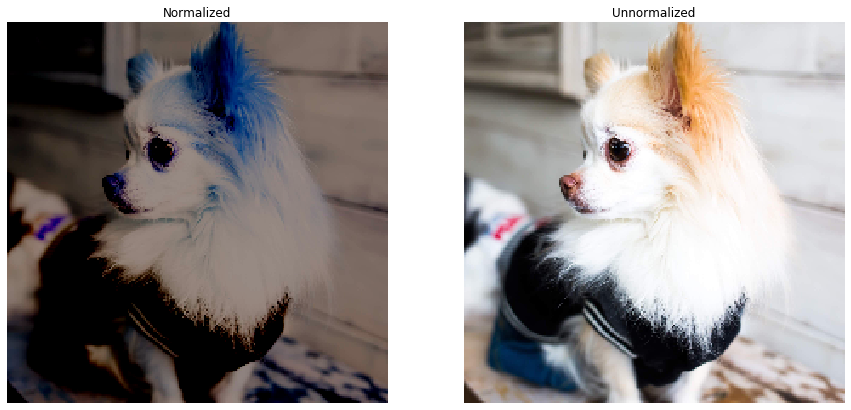

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title('Normalized')
plt.axis('off')
plt.imshow(norm_image/255.0)

plt.subplot(1, 2, 2)
plt.title('Unnormalized')
plt.axis('off')
plt.imshow(unnormalized_image/255.0)